**ROUND-1**

1.  IMPORTING LIBRARIES
2. DATA CLEANING AND DATA VISUALIZATION












In [ ]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import math
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as pl


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model
#from eli5.sklearn import PermutationImportance
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # Permutation importance and Prediction
from sklearn.ensemble import ExtraTreesRegressor # for Feature Importance

In [ ]:

from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


In [ ]:
#Cleaning of the given dataset such as region, standard error and dystopia residual
df_15 = pd.read_csv('2015.csv')
df_15.describe()    # to describe the variable type and the entries in the dataset
df_15.info()
usecols = ['Rank','Country','Score','GDP','Support',
                'Health','Freedom','Generosity','Corruption']
df_15.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True) 
df_15.columns = ['Country','Rank','Score','Support',
                'GDP','Health',
                'Freedom','Generosity','Corruption']
df_15['Year'] = 2015 
df_15.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


Standard error, Dystopia Residual , and region doesnt affect a countries happiness much so it can be dropped from the dataset


In [ ]:
#Since the data from the years have a bit of a different naming convention, we will abstract them to a common name that is target
target = ['Top','Top-Mid', 'Low-Mid', 'Low' ]
target_n = [4, 3, 2, 1]
df_15["target"] = pd.qcut(df_15['Rank'], len(target), labels=target)
df_15["target_n"] = pd.qcut(df_15['Rank'], len(target), labels=target_n)

In [ ]:
# Combining the datasets of all the years together in one dataset
finaldf = df_15.append([])
finaldf.dropna(inplace = True)

finaldf.isnull().any()
finaldf.info()
finaldf.head(125)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     158 non-null    object 
 1   Rank        158 non-null    int64  
 2   Score       158 non-null    float64
 3   Support     158 non-null    float64
 4   GDP         158 non-null    float64
 5   Health      158 non-null    float64
 6   Freedom     158 non-null    float64
 7   Generosity  158 non-null    float64
 8   Corruption  158 non-null    float64
 9   Year        158 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.6+ KB


,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
120,Nepal,121,4.514,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,2015
121,Ethiopia,122,4.512,0.19073,0.60406,0.44055,0.43450,0.15048,0.24325,2015
122,Sierra Leone,123,4.507,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2015
123,Mauritania,124,4.436,0.45407,0.86908,0.35874,0.24232,0.17461,0.21900,2015


Here we have appended all the dataset to a final cleaned dataset that is finaldf.We have also performed  statistical analysis of the final dataset by using describe() function.

In [ ]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })

Above we have used a dataframe which includes Root Mean Squared Error (RMSE), R-squared, Adjusted R-squared, and mean of the R-squared values obtained by the k-Fold Cross-Validation, which are the essential metrics to compare different models. 

In [ ]:
#  analysing the dataset to get the average score for the test data -"Happiness score vs gdp per capital "
px.scatter(finaldf, x="GDP", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")
train_data, test_data = train_test_split(finaldf, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['GDP'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['GDP'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Score'], dtype = pd.Series)
pred = lr.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))

rtrsm = float(format(lr.score(X_train, y_train),'.3f'))

rtesm = float(format(lr.score(X_test, y_test),'.3f'))

print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))


Average Score for Test Data: 5.528
Intercept: 2.3546931281404033
Coefficient: [3.01717727]


In the above analysis We have  predicted the  Happiness Score, so our dependent variable here is Score other features such as GPD Support Health, etc, are our independent variables.

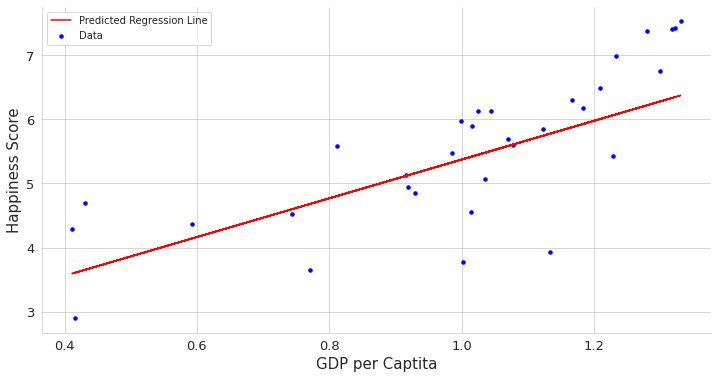

In [ ]:
#SIMPLE-LINEAR REGRESSION MODEL:

seabornInstance.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("GDP per Captita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



The above chart is the result of a simple linear regression model.Since we have just two dimensions at the simple regression, it is easy to draw it.

[None, None, None, None, None, None]

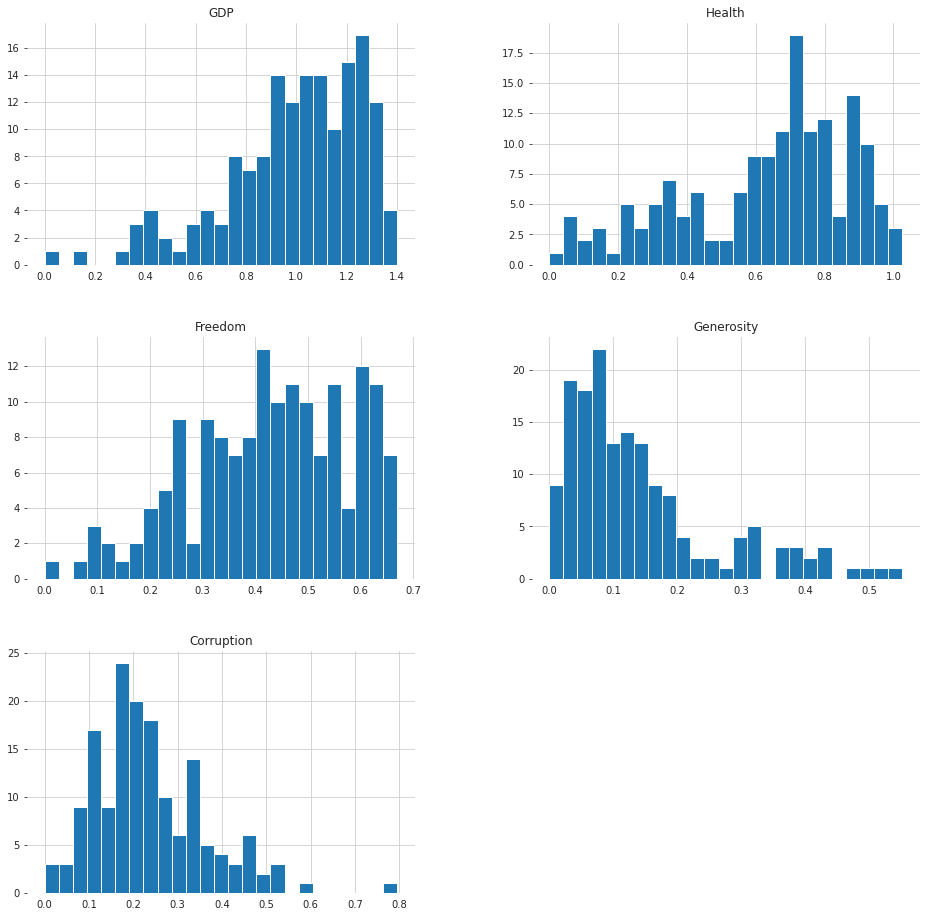

In [ ]:
# DISTRIBUTION OF ALL NUMERIC DATA
plt.rcParams['figure.figsize'] = (15, 15)
df1 = finaldf[['GDP', 'Health', 'Freedom',
              'Generosity','Corruption']]
h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10')
seabornInstance.despine(left = True, bottom = True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()]

In [ ]:
relation = df_15.corr()

In [ ]:
relation

,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,NaN
Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,NaN
Support,-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,NaN
GDP,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,NaN
Health,-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,NaN
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,NaN
Generosity,-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,NaN
Corruption,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


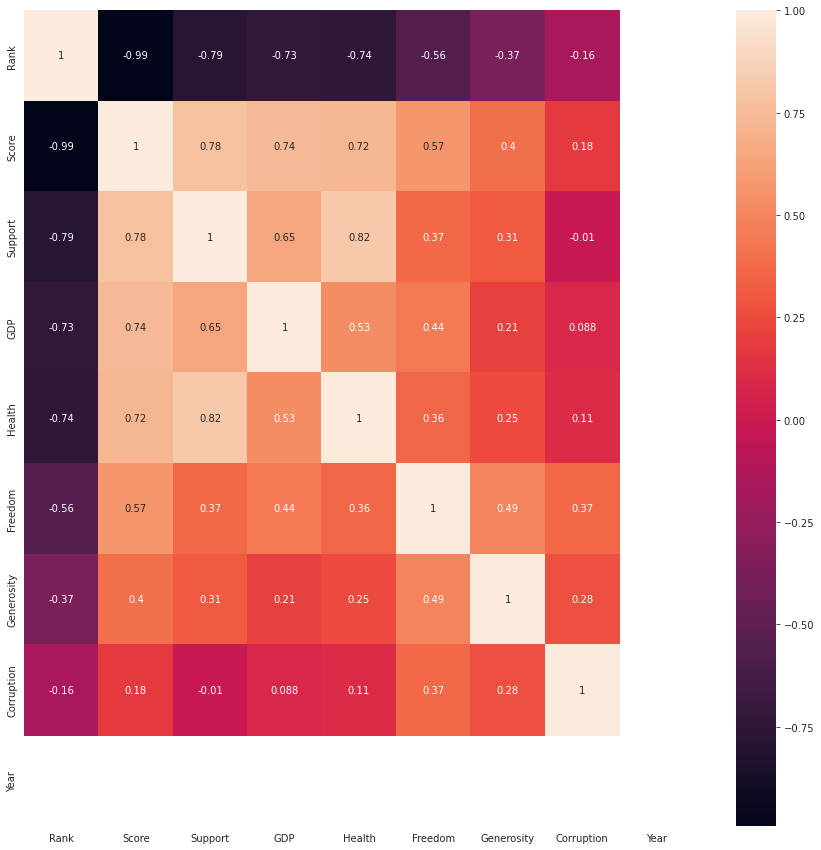

In [ ]:
sb.heatmap(relation,xticklabels=relation.columns,yticklabels=relation.columns,annot=True)

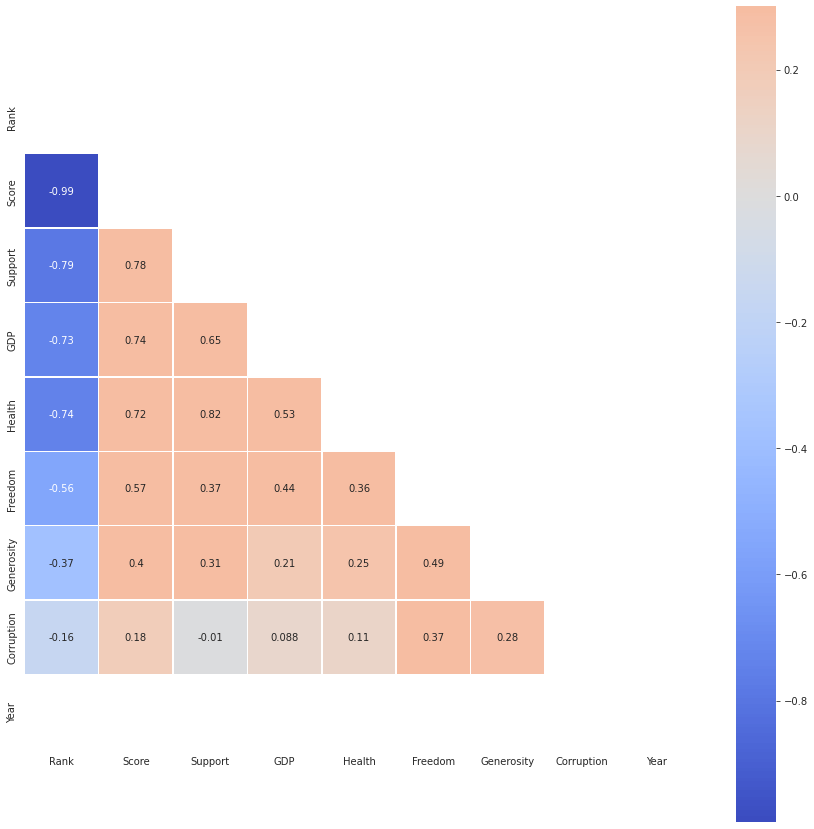

In [ ]:
#CORRELATION GRAPH
corr=df_15.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df_15.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5,annot=True)
plt.show()

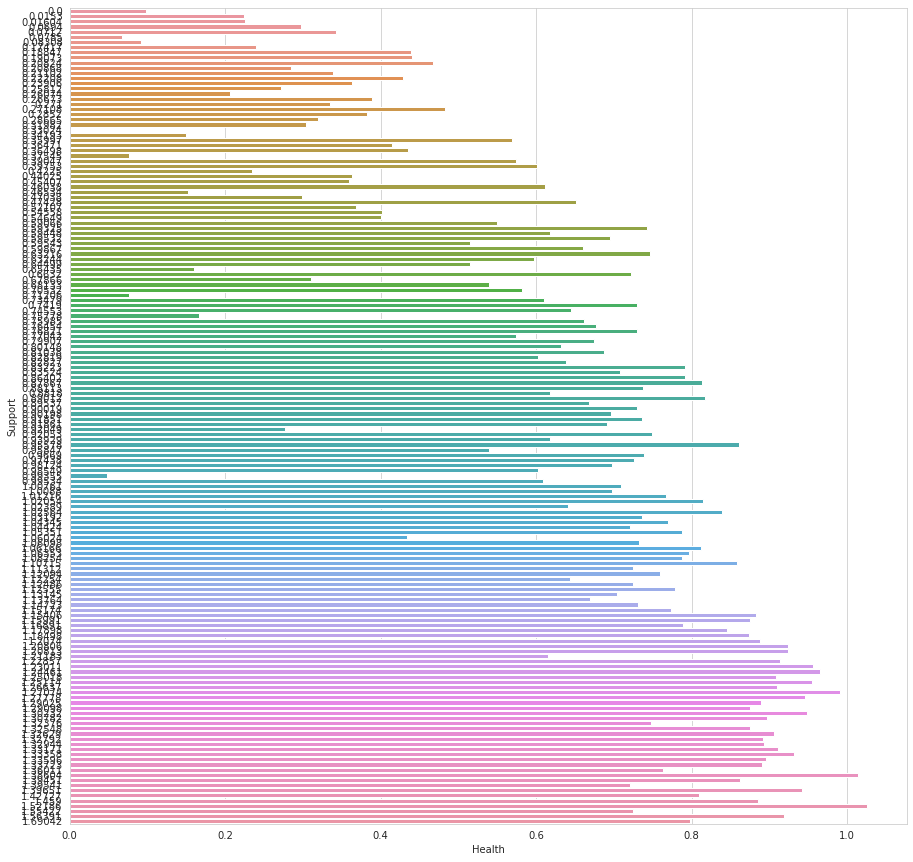

In [ ]:
# Overall  dataset
sns.barplot(x="Health", y="Support", data=df_15, orient='h')

Overall analysis of the dataset with respect to health vs support is shown above

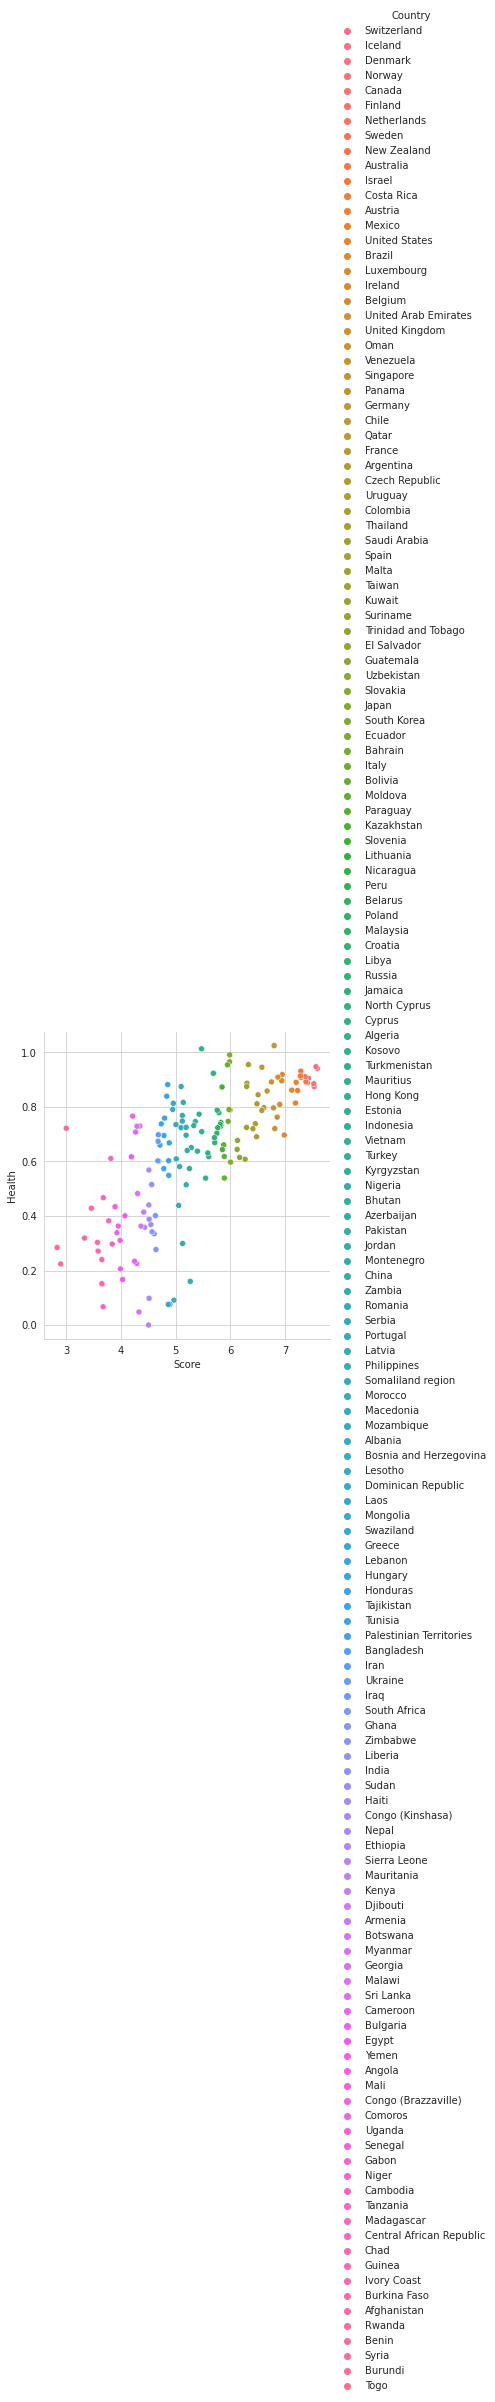

In [ ]:
sns.relplot(x='Score', y = 'Health',hue='Country', data=df_15)

PLOT OF HEALTH AND HAPPINESS

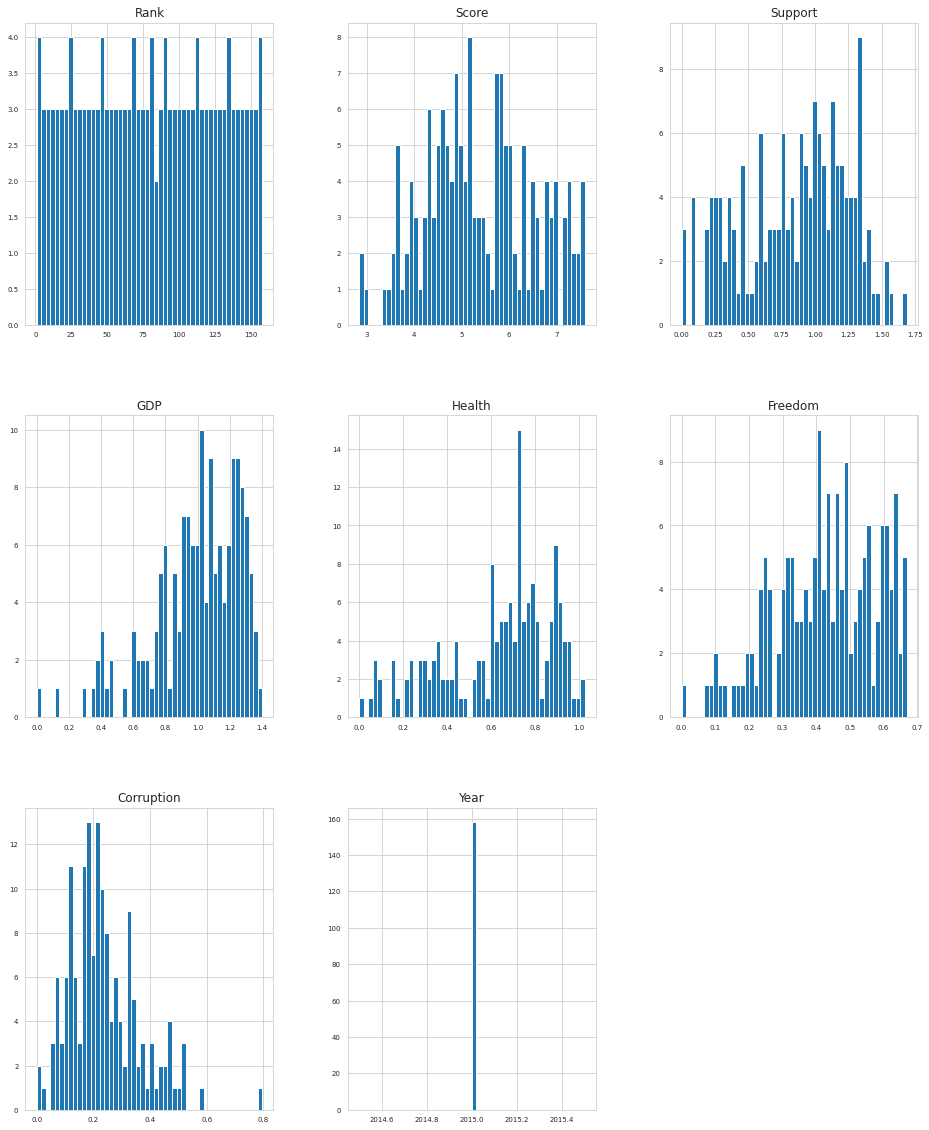

In [ ]:

df_15.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

We obtain average scores of all the factors from the above histograms
1)Support = 1.255
2)GDP = 0.9
3)Health=0.75
4)Freedom=0.43
5)Corruption=0.25


**ROUND-2**


* PRINCIPAL COMPONENT ANALYSIS




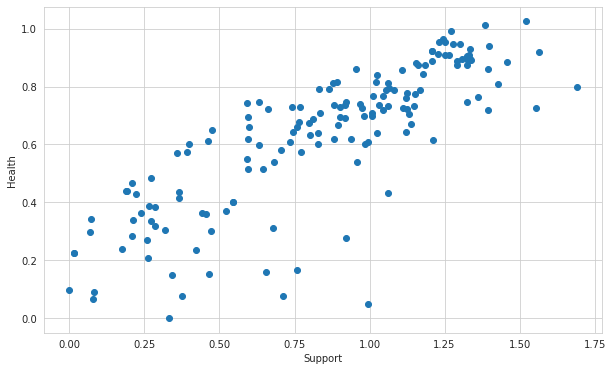

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_15['Support'], df_15['Health'])
ax.set_xlabel('Support')
ax.set_ylabel('Health')
plt.show()

From the above analysis we can conclude that Health increases from support

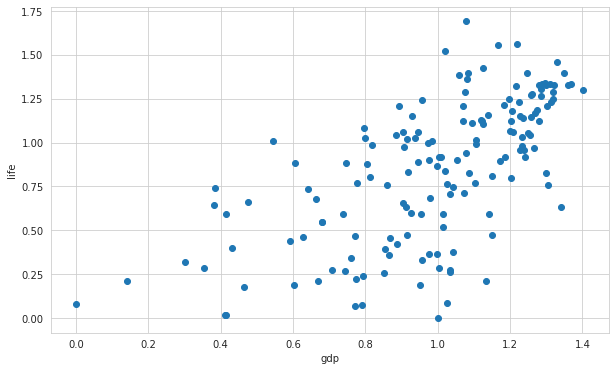

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_15['GDP'],df_15['Support'])
ax.set_xlabel('gdp')
ax.set_ylabel('life')
plt.show()

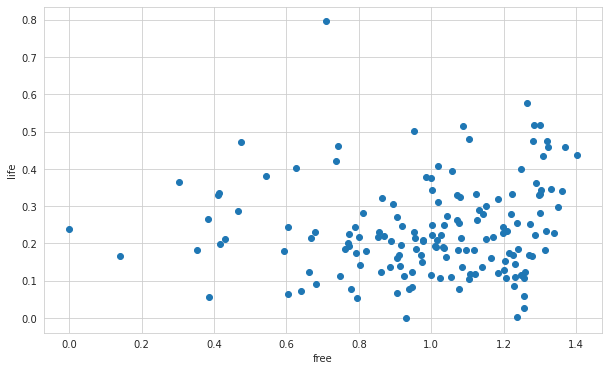

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_15['GDP'],df_15['Corruption'])
ax.set_xlabel('free')
ax.set_ylabel('life')
plt.show()

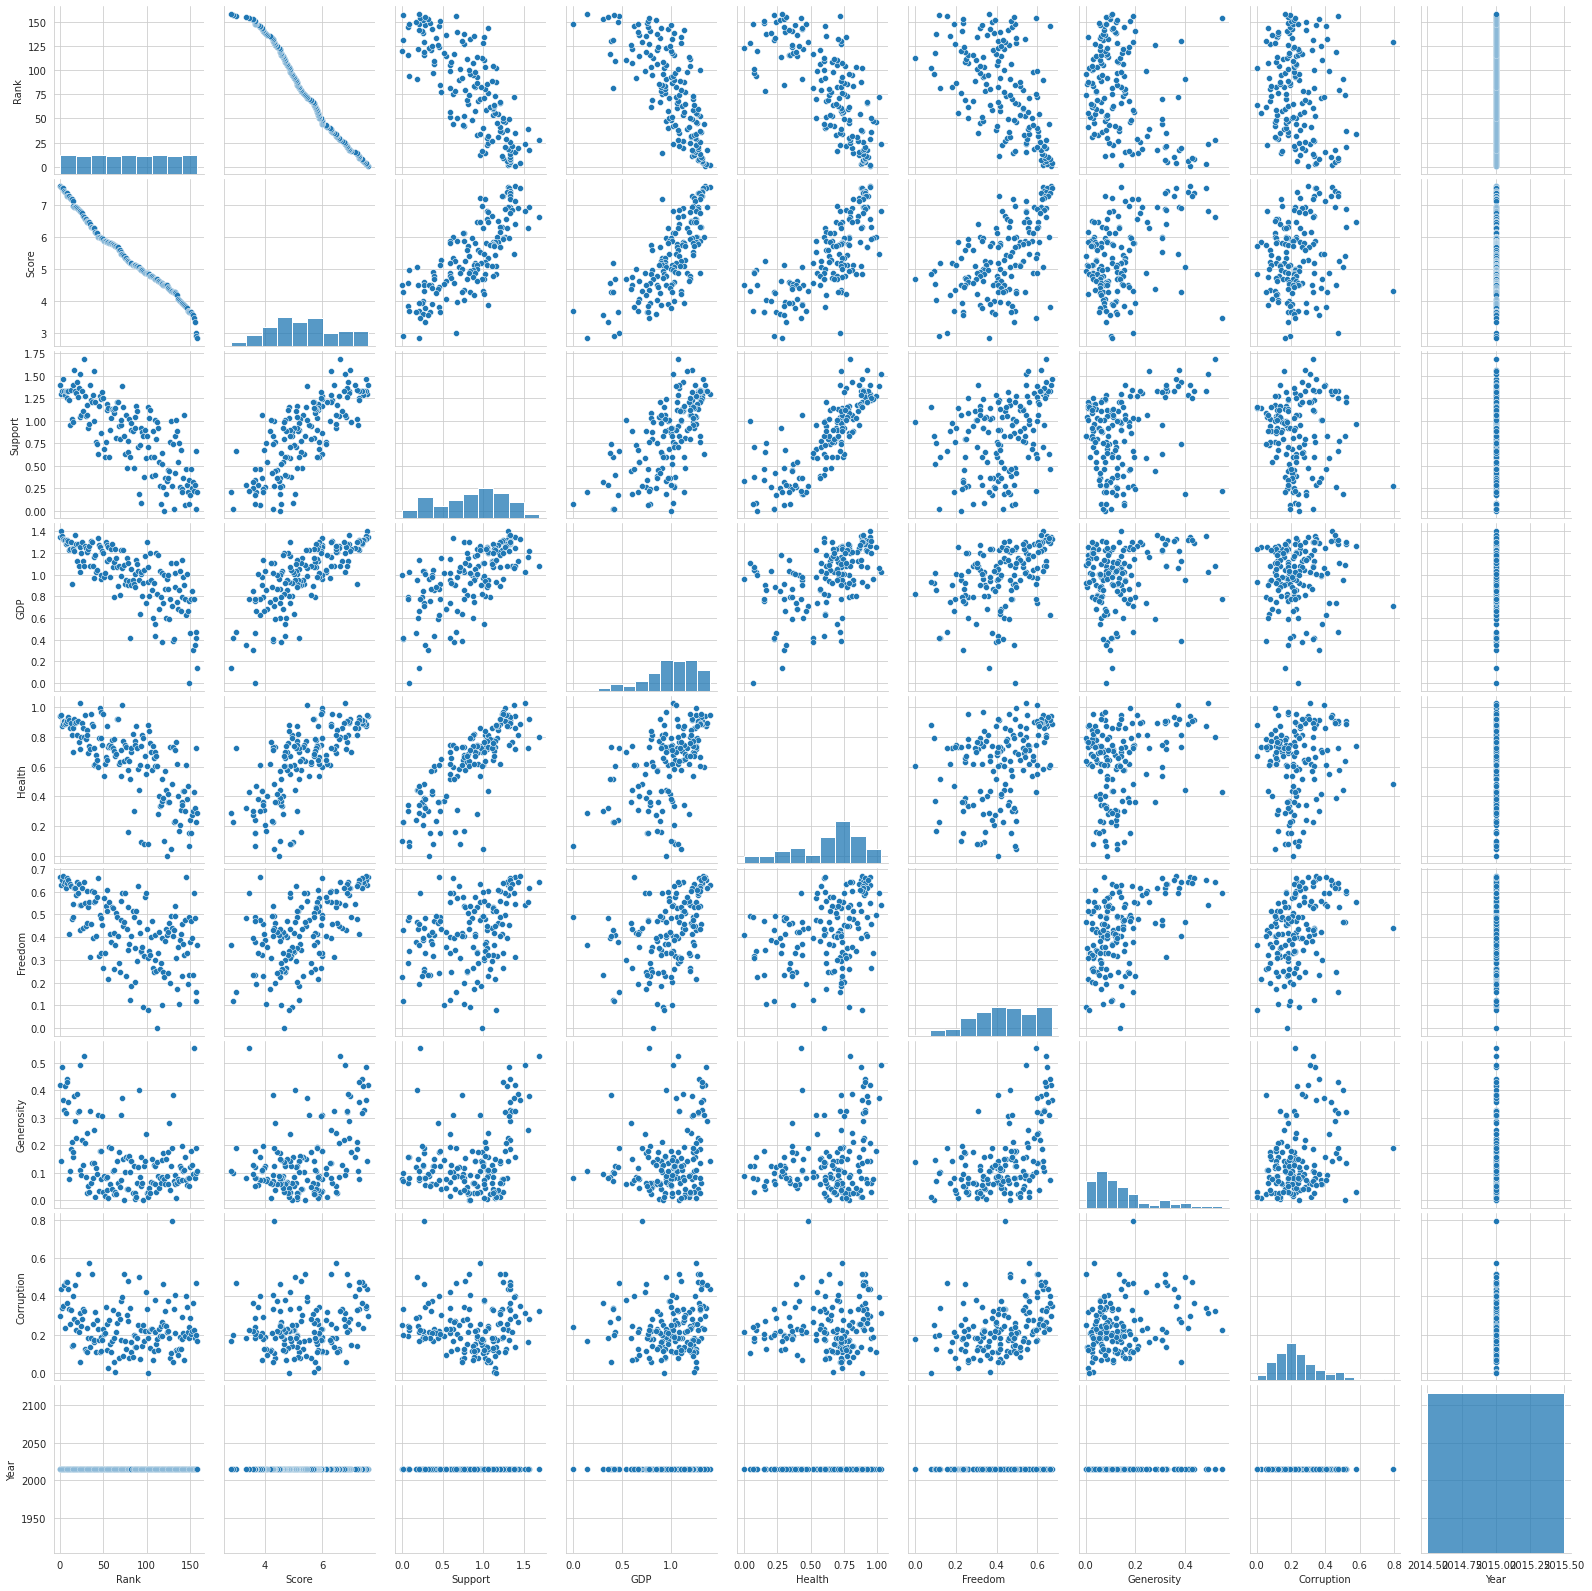

In [ ]:
sb.pairplot(df_15)

According to the above analysis genorsity didnt play a major role in happiness of the people.

In [ ]:
data_g = df_15
del df_15['Generosity']

Generosity coloumn is removed from the dataset since its affect is negligible


In [ ]:
df_15.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,2015


Top 5 happiest countries.

In [ ]:
df_15.tail()

,Country,Rank,Score,Support,GDP,Health,Freedom,Corruption,Year
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,2015
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,2015
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,2015
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,2015
157,Togo,158,2.839,0.20868,0.13995,0.28443,0.36453,0.16681,2015


Bottom 5 happiest countries


CONCLUSIONS:
1) Generosity has left affect on people's happiness
2) Regions that have good Economy,GDP and health, the happiness score is more
3) Happiness of the people  in a country highly depends on the  relationship with the government which is given in terms of trust and corruption. Most of the countries have less trust that is more corruption from the government.
4)Overall analysis till now shows that Switzerland is the happiest and Togo is the least happiest country.

In [ ]:
top_10 = df_15.head(10)
top_10

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


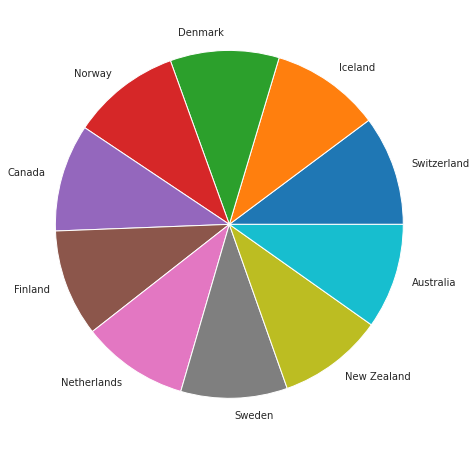

In [ ]:
plt.pie(top_10['Score'], labels = top_10["Country"])
plt.show()

In [ ]:
bottom_10 = df_15.tail(10)
bottom_10

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
148,Chad,149,3.667,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,2015
149,Guinea,150,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,2015
150,Ivory Coast,151,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,2015
151,Burkina Faso,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,2015
152,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,2015
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2015
157,Togo,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,2015


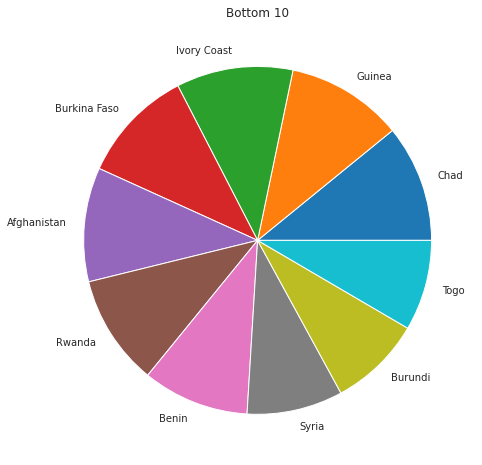

In [ ]:
plt.title("Bottom 10")
plt.pie(bottom_10['Score'], labels = bottom_10["Country"])
plt.show()

**ABOVE ANALYSIS SHOWS THE TOP 10 AND THE BOTTOM 10 COUNTRIES WITH RESPECT TO HAPPINESS INDEX**

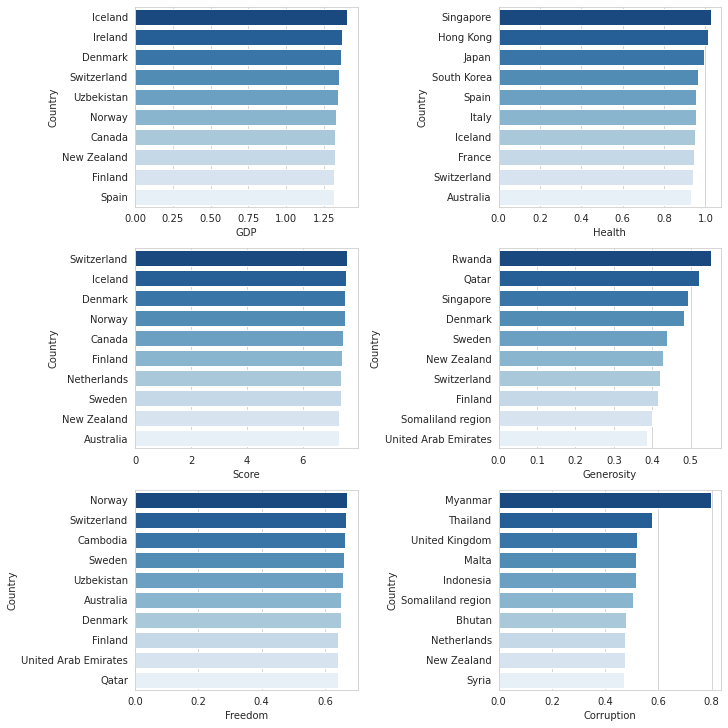

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
seabornInstance.barplot(x='GDP',y='Country',
                        data=finaldf.nlargest(10,'GDP'),
                        ax=axes[0,0],palette="Blues_r")
seabornInstance.barplot(x='Health' ,y='Country',
                        data=finaldf.nlargest(10,'Health'),
                        ax=axes[0,1],palette='Blues_r')
seabornInstance.barplot(x='Score' ,y='Country',
                        data=finaldf.nlargest(10,'Score'),
                        ax=axes[1,0],palette='Blues_r')
seabornInstance.barplot(x='Generosity' ,y='Country',
                        data=finaldf.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
seabornInstance.barplot(x='Freedom' ,y='Country',
                        data=finaldf.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
seabornInstance.barplot(x='Corruption' ,y='Country',
                        data=finaldf.nlargest(10,'Corruption'),
                        ax=axes[2,1],palette='Blues_r')

**Analysis of the countries which  are better positioned in each of the aspects being analyzed.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



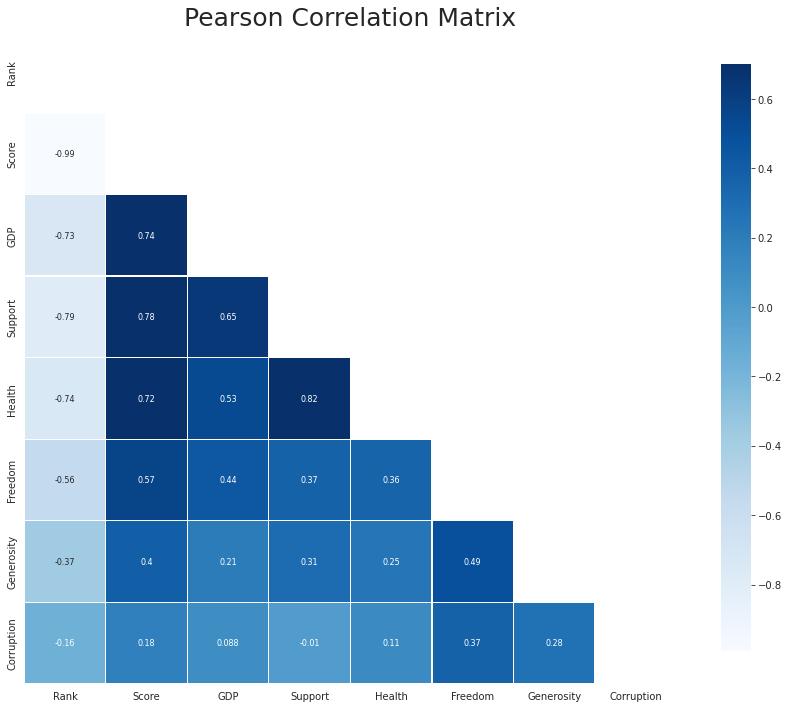

In [ ]:
mask = np.zeros_like(finaldf[usecols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)
seabornInstance.heatmap(finaldf[usecols].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="Blues", linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

**Checking Out the Correlation Among Explanatory Variables**
It looks like GDP, Health, and Support are strongly correlated with the Happiness score. Freedom correlates quite well with the Happiness score; however, Freedom connects quite well with all data. Corruption still has a mediocre correlation with the Happiness score.

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
scaled_data = preprocessing.scale(df_19.T)

In [ ]:
pca = PCA()
pca.fit(scaled_data)
#To generate coordinates for a PCA graph
pca_data = pca.transform(scaled_data)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

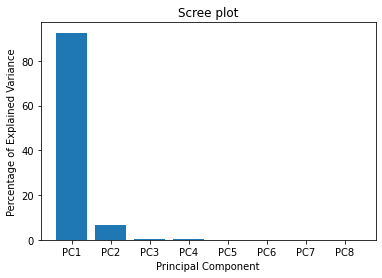

In [ ]:
pl.bar(x = range(1, len(per_var) +1 ), height=per_var, tick_label=labels)
pl.ylabel('Percentage of Explained Variance')
pl.xlabel('Principal Component')
pl.title('Scree plot')
pl.show()

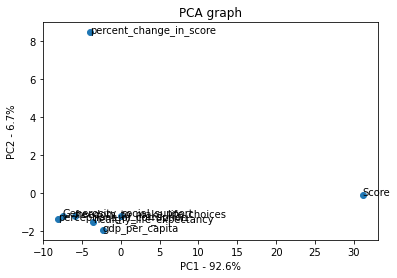

In [ ]:
pca_df = pd.DataFrame(pca_data, index = df_19.columns, columns = labels)
pl.scatter(pca_df.PC1, pca_df.PC2)
pl.title('PCA graph')
pl.xlabel('PC1 - {0}%'.format(per_var[0]))
pl.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
  pl.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

pl.show()

Health and life expectancy centre in the graph suggests that it is equally correlated to the columns on either of sides.

**ROUND-3**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


combining 2015, 2016, 2017 and 2018 csv files for using it to train the model

In [ ]:
happiness_2015 = pd.read_csv("2015.csv")
happiness_2015.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 
                          'Standard Error', 'Economy', 'Family', 
                          'Health', 'Freedom', 'Trust', 
                          'Generosity', 'Dystopia_Residual']



In [ ]:
happiness_2016 = pd.read_csv("2016.csv")

In [ ]:
happiness_2017 = pd.read_csv("2017.csv")
happiness_2018 = pd.read_csv("2018.csv")

In [ ]:
columns_2015 = ["Region", "Standard Error"]
new_dropped_2015 = happiness_2015.drop(columns_2015, axis=1)

In [ ]:
columns_2016 = ["Region", "Lower Confidence Interval", "Upper Confidence Interval"]
dropped_2016 = happiness_2016.drop(columns_2016, axis=1)

In [ ]:
dropped_2016.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 
                          'Economy', 'Family', 
                          'Health', 'Freedom', 'Trust', 
                          'Generosity', 'Dystopia_Residual']

In [ ]:
columns_2017 = ["Whisker.high", "Whisker.low"]
dropped_2017 = happiness_2017.drop(columns_2017, axis=1)
dropped_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 
                          'Economy', 'Family', 
                          'Health', 'Freedom', 'Trust', 
                          'Generosity', 'Dystopia_Residual']

columns_2018 = []
dropped_2018 = happiness_2018.drop(columns_2018, axis=1)
dropped_2018.columns = ['Happiness_Rank','Country', 'Happiness_Score', 
                          'Economy', 'Family', 
                          'Health', 'Freedom', 'Trust', 
                          'Generosity']



Concatenating everything into one variable

In [ ]:
frames = [new_dropped_2015, dropped_2016, dropped_2017, dropped_2018]
happiness = pd.concat(frames)

In [ ]:
happiness.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,470.000000
mean,78.747604,5.372021,0.918764,1.045891,0.584299,0.415706,0.176951,0.178962,2.092717
std,45.219609,1.131774,0.409808,0.328946,0.241948,0.154943,0.124367,0.130969,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.497750,0.606755,0.847945,0.404143,0.310500,0.081765,0.076012,1.737975
50%,79.000000,5.307000,0.983705,1.081274,0.632553,0.434635,0.149382,0.147189,2.094640
75%,118.000000,6.187250,1.239502,1.283387,0.772957,0.538998,0.246342,0.253640,2.455575
max,158.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.838075,0.819710,3.837720


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(happiness[['Happiness_Rank', 
                          'Economy', 'Family', 
                          'Health', 'Freedom', 'Trust', 
                          'Generosity']], happiness['Happiness_Score'])

LinearRegression()

In [ ]:
model.predict([[1, 1.34, 1.587, 0.986, 0.596, 0.393, 0.153]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([7.31367753])

In [ ]:
model.score(happiness[['Happiness_Rank', 
                          'Economy', 'Family', 
                          'Health', 'Freedom', 'Trust', 
                          'Generosity']], happiness['Happiness_Score'])

0.9871294976341496

In [ ]:
print(model.intercept_)

7.073570744689026


In [ ]:
print(model.coef_)

[-0.02399018  0.02019369  0.05910716  0.01926648  0.06896535  0.10582879
  0.27152641]


2) Finding top 5 countries which support a high happiness index in terms of Economy(GDP) and Trust in the government.

In [ ]:
happiness1_2015 = pd.read_csv("2015.csv")
happiness1_2016 = pd.read_csv("2016.csv")
happiness1_2017 = pd.read_csv("2017.csv")
happiness1_2018 = pd.read_csv("2018.csv")
columns1_2015 = ["Region", "Standard Error", "Happiness_Rank",
                 'Family', 'Health', 'Freedom', 
                 'Generosity', 'Dystopia_Residual']
dropped1_2015 = happiness1_2015.drop(columns1_2015, axis=1)
dropped1_2015.columns = ['Country','Happiness_Score', 
                          'Economy','Trust']

columns1_2016 = ["Region", "Lower Confidence Interval", "Upper Confidence Interval", "Happiness_Rank",
                 'Family', 'Health', 'Freedom', 
                 'Generosity', 'Dystopia_Residual']
dropped1_2016 = happiness1_2016.drop(columns1_2016, axis=1)
dropped1_2016.columns = ['Country','Happiness_Score', 
                          'Economy','Trust']
columns1_2017 = ["Whisker.high", "Whisker.low", 'Family', 'Happiness_Rank', 
                          'Health', 'Freedom', 
                          'Generosity', 'Dystopia_Residual']
dropped1_2017 = happiness1_2017.drop(columns1_2017, axis=1)
dropped1_2017.columns = ['Country','Happiness_Score', 
                          'Economy','Trust']

columns1_2018 = ["Happiness_Rank",
                 'Family', 'Health', 'Freedom to make life choices', 
                 'Generosity']
dropped1_2018 = happiness1_2018.drop(columns1_2018, axis=1)
dropped1_2018.columns = ['Country','Happiness_Score', 
                          'Economy','Trust']
                         

In [ ]:
frames1 = [dropped1_2015, dropped1_2016, dropped1_2017, dropped1_2018]
happiness1 = pd.concat(frames1)

Top 5 countries with in terms of economy and trust

In [ ]:
happiness1.head()

,Country,Happiness_Score,Economy,Trust
0,Switzerland,7.587,1.39651,0.41978
1,Iceland,7.561,1.30232,0.14145
2,Denmark,7.527,1.32548,0.48357
3,Norway,7.522,1.45900,0.36503
4,Canada,7.427,1.32629,0.32957


In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(happiness1[['Economy','Trust']], happiness1['Happiness_Score'])

LinearRegression()

In [ ]:
model1.predict([[1.376, 0.226]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6.48232057])

In [ ]:
#accuracy level
model1.score(happiness1[['Economy','Trust']], happiness1['Happiness_Score'])

0.6513684006903853

3) Happiness Index over a time span of 3 years

In [ ]:
dropped_2016.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [ ]:
dropped_2017.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [ ]:
dropped_2018.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.111282
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096597
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.050750
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.136500
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


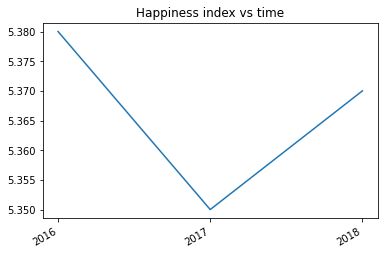

In [ ]:
import matplotlib.pyplot as plt
import sys
import os

data = {'happiness' : [5.38, 5.35, 5.37], 
        'time' : ["2016", "2017", "2018"]}

plt.figure(1)
plt.plot(data['time'] ,data['happiness'])
plt.gcf().autofmt_xdate()
plt.title('Happiness index vs time')
plt.show()

part one to find the countries with least change in happiness index

In [ ]:
import pandas as pd
HI = pd.read_csv("Variance Happiness.csv")
HI.head(17)

,Country,Happiness_Score(16),Economy(16),Family(16),Health(16),Freedom(16),Trust(16),Happiness_Score(17),Economy(17),Family(17),...,Freedom(17),Trust(17),Happiness_Score(18),Economy(18),Family(18),Health(18),Freedom(18),Trust(18),Total Happiness,Happiness variance
0,Burundi,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,2.905,0.091623,0.629794,...,0.059901,0.084148,2.905,0.091,0.627,0.145,0.065,0.076,8.715,1.868890e-16
1,Belize,5.956,0.87616,0.68655,0.45569,0.51231,0.10771,5.956,0.907975,1.081418,...,0.547509,0.096581,5.956,0.807,1.101,0.474,0.593,0.089,17.868,4.933560e-15
2,Japan,5.921,1.38007,1.06054,0.91491,0.46761,0.18985,5.920,1.416915,1.436338,...,0.505626,0.163761,5.915,1.294,1.462,0.988,0.553,0.150,17.756,6.888960e-06
3,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,7.504,1.480633,1.610574,...,0.627163,0.153527,7.495,1.343,1.644,0.914,0.677,0.138,22.500,1.400050e-05
4,Costa Rica,7.087,1.06879,1.02152,0.76146,0.55225,0.10547,7.079,1.109706,1.416404,...,0.580132,0.100107,7.072,1.010,1.459,0.817,0.632,0.101,21.238,3.755560e-05
5,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,7.522,1.482383,1.551122,...,0.626007,0.400770,7.555,1.351,1.590,0.868,0.683,0.408,22.603,2.162240e-04
6,Italy,5.977,1.35495,1.04167,0.85102,0.18827,0.02556,5.964,1.395067,1.444923,...,0.256451,0.028028,6.000,1.264,1.501,0.946,0.281,0.028,17.941,2.215530e-04
7,Congo (Kinshasa),4.272,0.05661,0.80676,0.18800,0.15602,0.06075,4.280,0.092102,1.229023,...,0.235961,0.060241,4.245,0.069,1.136,0.204,0.312,0.052,12.797,2.242240e-04
8,Ecuador,5.976,0.97306,0.85974,0.68613,0.40270,0.18037,6.008,1.000820,1.286169,...,0.455198,0.140135,5.973,0.889,1.330,0.736,0.556,0.120,17.957,2.508870e-04
9,Australia,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,7.284,1.484415,1.510042,...,0.601607,0.301184,7.272,1.340,1.573,0.910,0.647,0.302,21.869,2.962230e-04


*italicised text*
part two to find the parametrs which affects the happiness index score with time.

We have found the varience of the total of all the parameters from 2016 - 2018 dataset.
From the above calculations, finally we get the output as below:

In [ ]:
import pandas as pd
parameters = pd.read_csv("parameters.csv")
parameters.head(17)

,ECONOMY,FAMILY,HEALTH,FREEDOM,TRUST
0,50.229,1324.529,16.17956,42.0679,4.371173


From the above data we can infer that the parameters economy, family and freedom varies largely with time.

**CONCLUSIONS**


*   PCA is an unsupervised method (only takes in data, no dependent variables) and Linear regression (in general) is a supervised learning method. If you have a dependent variable, a supervised method would be suited to your goals.
*   Also through PCA we figured out that the parameter generosity didnt play a major role in finding out the happiness index of a country

*   To test the affect of generosity  parameter we created a multiple linear regression model without genorosity and the score(accuracy) of the model reduced by 0.001% which can be neglected.
*  So the inference which we got through PCA increases the accuracy of the model by a very small value.

*  We used multiple regression algorithm to create the model 
*  The accuracy of the model is 98.713% 

*   Happiness index vs time graph depicts that 2016 had the highest happiness score and this reduced in 2017 and again increased in 2018.
*   The parameter which largely vary with time are family, economy and freedom , family varies by a large margin.











